### CIVL 498A_Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import datetime as dt
%matplotlib inline

In [2]:
t_data = pd.read_csv('US_Accidents.csv')

In [3]:
pd.set_option('display.max_columns', 500)
t_data.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [4]:
t_data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,Fa

In [5]:
#t_data_LA = t_data['City'].str.contains("Los Angeles")
t_data_La = t_data.loc[t_data['City'] == 'Los Angeles']


In [6]:
t_data_LA_2 = t_data_La.drop(columns = ['ID', 'Description', 'Number', 'Street','County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Humidity(%)', 'Pressure(in)', 'Wind_Direction', 'Wind_Speed(mph)','Amenity', 'Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout','Station','Stop', 'Traffic_Calming', 'Turning_Loop', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [7]:
dt.date.today()
t_data_LA_2.isnull().sum()

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Side                     0
City                     0
Temperature(F)         542
Wind_Chill(F)        12362
Visibility(mi)         326
Precipitation(in)    10528
Weather_Condition      301
Crossing                 0
Junction                 0
Traffic_Signal           0
Sunrise_Sunset           0
dtype: int64

In [8]:
#try:
#    t_data_LA_2['End_Time'] = t_data_LA_2['End_Time'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S .%f'))
#except ValueError:

from dateutil.parser import parse
P_ST = t_data_LA_2['Start_Time'].apply(lambda x: parse(x))
P_ET = t_data_LA_2['End_Time'].apply(lambda x: parse(x))

t_data_LA_2["Delay"] = P_ET - P_ST



#t_data_LA["Delay"] = t_data_LA['Start_Time'] - t_data_LA['End_Time'] .str[:5] 
# (' \t\r\n')
#.str.strip('')


#t_data_LA_2['End_Time_R'] =  dt.datetime.strptime(t_data_LA_2['End_Time'], '%Y-%m-%d %H:%M:%S')

#t_data_LA_2[['Start_Date','Start_Time']] = t_data_LA_2.Start_Time.str.split(" ",expand=True)
#t_data_LA_2[['End_Date','End_Time']] = t_data_LA_2.End_Time.str.split(" ",expand=True)



<AxesSubplot:>

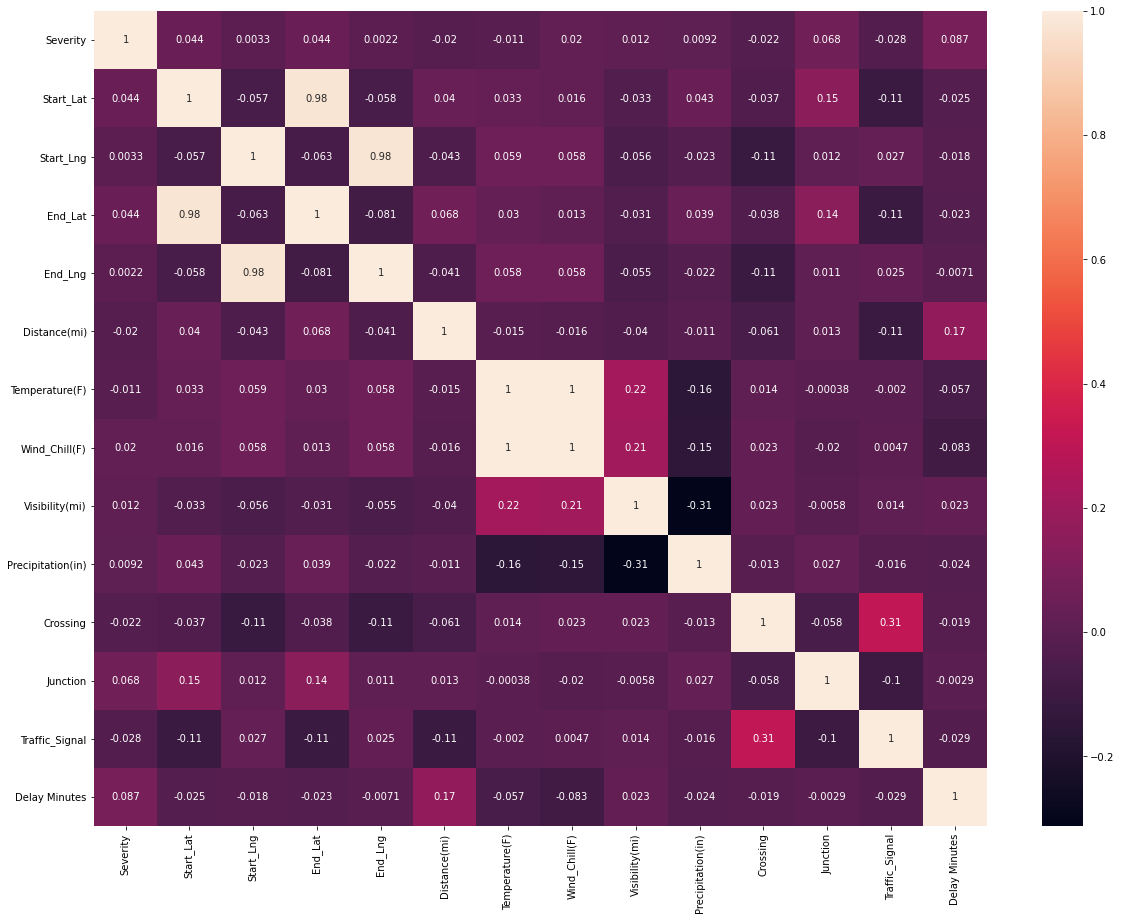

In [9]:
t_data_LA_2["Delay Minutes"] = (t_data_LA_2["Delay"].dt.total_seconds())/60
t_data_LA_2["Delay Minutes"]
t_data_LA_2_CORR = t_data_LA_2.corr()
plt.figure(figsize=(20,15))
sns.heatmap(data=t_data_LA_2_CORR, annot=True)

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

t_side = t_data_LA_2[['Side']]
t_side_OHE = encoder.fit_transform(t_side)
t_side_OHE

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [11]:
side_labels = t_data_LA_2.Side.unique()
side_labels.sort()
print(side_labels)
#ffturn label into nan turn into string
#one hot it
#remove column
#classifiy severity based on delay

['L' 'R']


In [12]:
for i in range (len(side_labels)):
    t_data_LA_2[side_labels[i]] = t_side_OHE[:,i]

t_data_LA_2.head(10)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,Temperature(F),Wind_Chill(F),Visibility(mi),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Delay,Delay Minutes,L,R
5235,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.092560,-118.206220,34.092560,-118.206220,0.000,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0
5238,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.948190,-118.279730,33.946760,-118.279750,0.099,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0
5253,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.023300,-118.172880,34.021380,-118.173390,0.136,R,Los Angeles,55.9,NaN,10.0,NaN,Clear,False,True,False,Day,0 days 06:00:00,360.0,0.0,1.0
5271,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.144700,-118.278650,34.141040,-118.277840,0.257,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0
5273,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.099140,-118.251853,34.099817,-118.251396,0.054,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0
5277,2,2016-03-23 13:07:50,2016-03-23 19:07:50,33.984070,-118.280700,33.980680,-118.280980,0.235,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0
5278,2,2016-03-23 13:24:23,2016-03-23 19:24:23,34.052698,-118.226924,34.052697,-118.226921,0.000,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0
5280,2,2016-03-23 13:32:23,2016-03-23 19:32:23,34.076240,-118.231290,34.074040,-118.233540,0.199,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0
5283,2,2016-03-23 13:42:44,2016-03-23 19:42:44,34.015410,-118.170780,34.017200,-118.174320,0.237,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0
5285,2,2016-03-23 13:58:05,2016-03-23 19:58:05,34.032875,-118.222227,34.032882,-118.222224,0.001,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0


In [13]:
t_weather = t_data_LA_2[['Weather_Condition']]
t_weather_OHE = encoder.fit_transform(t_weather)
print(t_weather_OHE)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
weather_labels = t_data_LA_2.Weather_Condition.unique()
weather_labels[12] = 'NaN'
#t_data_LA_2[['NaN']] = t_data_LA_2[['NaN']].fillna('NaN', inplace = True)

weather_labels.sort()
print(weather_labels)

['Blowing Dust' 'Clear' 'Cloudy' 'Duststorm' 'Fair' 'Fair / Windy' 'Fog'
 'Haze' 'Heavy Rain' 'Heavy Rain / Windy' 'Heavy T-Storm' 'Light Drizzle'
 'Light Rain' 'Light Rain / Windy' 'Light Rain with Thunder' 'Mist'
 'Mostly Cloudy' 'Mostly Cloudy / Windy' 'NaN' 'Overcast' 'Partly Cloudy'
 'Partly Cloudy / Windy' 'Patches of Fog' 'Rain' 'Rain / Windy'
 'Scattered Clouds' 'Shallow Fog' 'Smoke' 'T-Storm' 'Thunder'
 'Thunderstorm']


In [15]:
for i in range (len(weather_labels)):
    t_data_LA_2[weather_labels[i]] = t_weather_OHE[:,i]

t_data_LA_2

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,Temperature(F),Wind_Chill(F),Visibility(mi),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Delay,Delay Minutes,L,R,Blowing Dust,Clear,Cloudy,Duststorm,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Light Drizzle,Light Rain,Light Rain / Windy,Light Rain with Thunder,Mist,Mostly Cloudy,Mostly Cloudy / Windy,NaN,Overcast,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Rain,Rain / Windy,Scattered Clouds,Shallow Fog,Smoke,T-Storm,Thunder,Thunderstorm
5235,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.09256,-118.206220,34.092560,-118.206220,0.000,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5238,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.94819,-118.279730,33.946760,-118.279750,0.099,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5253,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.02330,-118.172880,34.021380,-118.173390,0.136,R,Los Angeles,55.9,NaN,10.0,NaN,Clear,False,True,False,Day,0 days 06:00:00,360.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5271,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.14470,-118.278650,34.141040,-118.277840,0.257,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5273,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.09914,-118.251853,34.099817,-118.251396,0.054,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844905,2,2019-08-22 17:07:14,2019-08-22 17:36:02,34.03693,-118.438770,34.025590,-118.429180,0.957,R,Los Angeles,72.0,72.0,10.0,0.0,Fair,False,True,False,Day,0 days 00:28:48,28.800000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2845305,3,2019-08-23 04:04:48,2019-08-23 04:33:53,34.07579,-118.276680,34.074310,-118.272250,0.273,R,Los Angeles,67.0,67.0,7.0,0.0,Cloudy,False,False,False,Night,0 days 00:29:05,29.083333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2845309,2,2019-08-23 12:52:31,2019-08-23 13:20:14,34.02379,-118.276390,34.025760,-118.275290,0.150,R,Los Angeles,81.0,81.0,8.0,0.0,Fair,False,False,False,Day,0 days 00:27:43,27.716667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2845312,2,2019-08-23 13:42:50,2019-08-23 14:10:06,34.07061,-118.263910,34.069740,-118.261550,0.148,R,Los Angeles,82.0,82.0,9.0,0.0,Fair,False,True,False,Day,0 days 00:27:16,27.266667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
t_crossing = t_data_LA_2[['Crossing']]
t_crossing_OHE = encoder.fit_transform(t_crossing)
t_crossing_OHE

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [17]:
crossing_labels = t_data_LA_2.Crossing.unique()
crossing_labels.sort()
print(crossing_labels)

[False  True]


In [18]:
t_data_LA_2['crossing_false'] = t_crossing_OHE[:,0]
t_data_LA_2['crossing_true'] = t_crossing_OHE[:,1]

t_data_LA_2.head(10)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,Temperature(F),Wind_Chill(F),Visibility(mi),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Delay,Delay Minutes,L,R,Blowing Dust,Clear,Cloudy,Duststorm,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Light Drizzle,Light Rain,Light Rain / Windy,Light Rain with Thunder,Mist,Mostly Cloudy,Mostly Cloudy / Windy,NaN,Overcast,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Rain,Rain / Windy,Scattered Clouds,Shallow Fog,Smoke,T-Storm,Thunder,Thunderstorm,crossing_false,crossing_true
5235,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.092560,-118.206220,34.092560,-118.206220,0.000,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5238,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.948190,-118.279730,33.946760,-118.279750,0.099,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5253,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.023300,-118.172880,34.021380,-118.173390,0.136,R,Los Angeles,55.9,NaN,10.0,NaN,Clear,False,True,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5271,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.144700,-118.278650,34.141040,-118.277840,0.257,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5273,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.099140,-118.251853,34.099817,-118.251396,0.054,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5277,2,2016-03-23 13:07:50,2016-03-23 19:07:50,33.984070,-118.280700,33.980680,-118.280980,0.235,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5278,2,2016-03-23 13:24:23,2016-03-23 19:24:23,34.052698,-118.226924,34.052697,-118.226921,0.000,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5280,2,2016-03-23 13:32:23,2016-03-23 19:32:23,34.076240,-118.231290,34.074040,-118.233540,0.199,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5283,2,2016-03-23 13:42:44,2016-03-23 19:42:44,34.015410,-118.170780,34.017200,-118.174320,0.237,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5285,2,2016-03-23 13:58:05,2016-03-23 19:58:05,34.032875,-118.222227,34.032882,-118.222224,0.001,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
t_junction = t_data_LA_2[['Junction']]
t_junction_OHE = encoder.fit_transform(t_junction)
t_junction_OHE

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [20]:
junction_labels = t_data_LA_2.Junction.unique()
junction_labels.sort()
print(junction_labels)

[False  True]


In [21]:
t_data_LA_2['junction_false'] = t_junction_OHE[:,0]
t_data_LA_2['junction_true'] = t_junction_OHE[:,1]

t_data_LA_2.head(10)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,Temperature(F),Wind_Chill(F),Visibility(mi),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Delay,Delay Minutes,L,R,Blowing Dust,Clear,Cloudy,Duststorm,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Light Drizzle,Light Rain,Light Rain / Windy,Light Rain with Thunder,Mist,Mostly Cloudy,Mostly Cloudy / Windy,NaN,Overcast,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Rain,Rain / Windy,Scattered Clouds,Shallow Fog,Smoke,T-Storm,Thunder,Thunderstorm,crossing_false,crossing_true,junction_false,junction_true
5235,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.092560,-118.206220,34.092560,-118.206220,0.000,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5238,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.948190,-118.279730,33.946760,-118.279750,0.099,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5253,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.023300,-118.172880,34.021380,-118.173390,0.136,R,Los Angeles,55.9,NaN,10.0,NaN,Clear,False,True,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5271,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.144700,-118.278650,34.141040,-118.277840,0.257,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5273,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.099140,-118.251853,34.099817,-118.251396,0.054,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5277,2,2016-03-23 13:07:50,2016-03-23 19:07:50,33.984070,-118.280700,33.980680,-118.280980,0.235,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5278,2,2016-03-23 13:24:23,2016-03-23 19:24:23,34.052698,-118.226924,34.052697,-118.226921,0.000,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5280,2,2016-03-23 13:32:23,2016-03-23 19:32:23,34.076240,-118.231290,34.074040,-118.233540,0.199,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5283,2,2016-03-23 13:42:44,2016-03-23 19:42:44,34.015410,-118.170780,34.017200,-118.174320,0.237,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5285,2,2016-03-23 13:58:05,2016-03-23 19:58:05,34.032875,-118.222227,34.032882,-118.222224,0.001,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [22]:
t_traffic_signal = t_data_LA_2[['Traffic_Signal']]
t_traffic_signal_OHE = encoder.fit_transform(t_traffic_signal)
t_traffic_signal_OHE

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [23]:
traffic_signal_labels = t_data_LA_2.Traffic_Signal.unique()
traffic_signal_labels.sort()
print(traffic_signal_labels)

[False  True]


In [24]:
t_data_LA_2['traffic_signal_false'] = t_traffic_signal_OHE[:,0]
t_data_LA_2['traffic_signal_true'] = t_traffic_signal_OHE[:,1]

t_data_LA_2.head(10)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,Temperature(F),Wind_Chill(F),Visibility(mi),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Delay,Delay Minutes,L,R,Blowing Dust,Clear,Cloudy,Duststorm,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Light Drizzle,Light Rain,Light Rain / Windy,Light Rain with Thunder,Mist,Mostly Cloudy,Mostly Cloudy / Windy,NaN,Overcast,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Rain,Rain / Windy,Scattered Clouds,Shallow Fog,Smoke,T-Storm,Thunder,Thunderstorm,crossing_false,crossing_true,junction_false,junction_true,traffic_signal_false,traffic_signal_true
5235,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.092560,-118.206220,34.092560,-118.206220,0.000,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5238,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.948190,-118.279730,33.946760,-118.279750,0.099,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5253,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.023300,-118.172880,34.021380,-118.173390,0.136,R,Los Angeles,55.9,NaN,10.0,NaN,Clear,False,True,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5271,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.144700,-118.278650,34.141040,-118.277840,0.257,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5273,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.099140,-118.251853,34.099817,-118.251396,0.054,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5277,2,2016-03-23 13:07:50,2016-03-23 19:07:50,33.984070,-118.280700,33.980680,-118.280980,0.235,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5278,2,2016-03-23 13:24:23,2016-03-23 19:24:23,34.052698,-118.226924,34.052697,-118.226921,0.000,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5280,2,2016-03-23 13:32:23,2016-03-23 19:32:23,34.076240,-118.231290,34.074040,-118.233540,0.199,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5283,2,2016-03-23 13:42:44,2016-03-23 19:42:44,34.015410,-118.170780,34.017200,-118.174320,0.237,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5285,2,2016-03-23 13:58:05,2016-03-23 19:58:05,34.032875,-118.222227,34.032882,-118.222224,0.001,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [25]:
t_sunrise_sunset = t_data_LA_2[["Sunrise_Sunset"]]
t_sunrise_sunset_OHE = encoder.fit_transform(t_sunrise_sunset)
print(t_sunrise_sunset_OHE)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [26]:
sunrise_sunset_labels = t_data_LA_2.Sunrise_Sunset.unique()
sunrise_sunset_labels.sort()
print(sunrise_sunset_labels)

['Day' 'Night']


In [27]:
for i in range (len(sunrise_sunset_labels)):
    t_data_LA_2[sunrise_sunset_labels[i]] = t_sunrise_sunset_OHE[:,i]

t_data_LA_2.head(10)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,Temperature(F),Wind_Chill(F),Visibility(mi),Precipitation(in),Weather_Condition,Crossing,Junction,Traffic_Signal,Sunrise_Sunset,Delay,Delay Minutes,L,R,Blowing Dust,Clear,Cloudy,Duststorm,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Light Drizzle,Light Rain,Light Rain / Windy,Light Rain with Thunder,Mist,Mostly Cloudy,Mostly Cloudy / Windy,NaN,Overcast,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Rain,Rain / Windy,Scattered Clouds,Shallow Fog,Smoke,T-Storm,Thunder,Thunderstorm,crossing_false,crossing_true,junction_false,junction_true,traffic_signal_false,traffic_signal_true,Day,Night
5235,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.092560,-118.206220,34.092560,-118.206220,0.000,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5238,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.948190,-118.279730,33.946760,-118.279750,0.099,R,Los Angeles,64.0,NaN,10.0,NaN,Clear,False,False,False,Night,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5253,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.023300,-118.172880,34.021380,-118.173390,0.136,R,Los Angeles,55.9,NaN,10.0,NaN,Clear,False,True,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5271,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.144700,-118.278650,34.141040,-118.277840,0.257,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5273,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.099140,-118.251853,34.099817,-118.251396,0.054,R,Los Angeles,73.9,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5277,2,2016-03-23 13:07:50,2016-03-23 19:07:50,33.984070,-118.280700,33.980680,-118.280980,0.235,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5278,2,2016-03-23 13:24:23,2016-03-23 19:24:23,34.052698,-118.226924,34.052697,-118.226921,0.000,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5280,2,2016-03-23 13:32:23,2016-03-23 19:32:23,34.076240,-118.231290,34.074040,-118.233540,0.199,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5283,2,2016-03-23 13:42:44,2016-03-23 19:42:44,34.015410,-118.170780,34.017200,-118.174320,0.237,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5285,2,2016-03-23 13:58:05,2016-03-23 19:58:05,34.032875,-118.222227,34.032882,-118.222224,0.001,R,Los Angeles,75.0,NaN,10.0,NaN,Clear,False,False,False,Day,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0

In [28]:
#t_data_LA_2.hist(bins = 50, figsize = (20,15))
#plt.show()

In [29]:
t_data_LA_2 = t_data_LA_2.drop(columns = 'Weather_Condition')
t_data_LA_2 = t_data_LA_2.drop(columns = 'Crossing')
t_data_LA_2 = t_data_LA_2.drop(columns = 'Side')
t_data_LA_2 = t_data_LA_2.drop(columns = 'Junction')
t_data_LA_2 = t_data_LA_2.drop(columns = 'Traffic_Signal')
t_data_LA_2 = t_data_LA_2.drop(columns = 'Sunrise_Sunset')
t_data_LA_2 = t_data_LA_2.drop(columns = 'NaN')

In [30]:
#t_data_LA_2['Delay Minutes'].describe()
#t_data_LA_2['Delay Minutes'].hist(bins = 200, figsize = (20,15))

Average Delay Hours

Fatal - 1.5 Hrs - 90 mins

Major - 0.82 Hrs - 49.2 mins

Minor - 0.45 Hrs - 27 mins

Injury - 0.47 Hrs - 28.2 mins

PDO - 0.19 Hrs - 11.4 mins

In [31]:
t_data_LA_2['Severity_Classifier'] = t_data_LA_2['Delay Minutes']
t_data_LA_2.head(10)

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Visibility(mi),Precipitation(in),Delay,Delay Minutes,L,R,Blowing Dust,Clear,Cloudy,Duststorm,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Light Drizzle,Light Rain,Light Rain / Windy,Light Rain with Thunder,Mist,Mostly Cloudy,Mostly Cloudy / Windy,Overcast,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Rain,Rain / Windy,Scattered Clouds,Shallow Fog,Smoke,T-Storm,Thunder,Thunderstorm,crossing_false,crossing_true,junction_false,junction_true,traffic_signal_false,traffic_signal_true,Day,Night,Severity_Classifier
5235,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.092560,-118.206220,34.092560,-118.206220,0.000,Los Angeles,64.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,360.0
5238,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.948190,-118.279730,33.946760,-118.279750,0.099,Los Angeles,64.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,360.0
5253,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.023300,-118.172880,34.021380,-118.173390,0.136,Los Angeles,55.9,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,360.0
5271,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.144700,-118.278650,34.141040,-118.277840,0.257,Los Angeles,73.9,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,360.0
5273,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.099140,-118.251853,34.099817,-118.251396,0.054,Los Angeles,73.9,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,360.0
5277,2,2016-03-23 13:07:50,2016-03-23 19:07:50,33.984070,-118.280700,33.980680,-118.280980,0.235,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,360.0
5278,2,2016-03-23 13:24:23,2016-03-23 19:24:23,34.052698,-118.226924,34.052697,-118.226921,0.000,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,360.0
5280,2,2016-03-23 13:32:23,2016-03-23 19:32:23,34.076240,-118.231290,34.074040,-118.233540,0.199,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,360.0
5283,2,2016-03-23 13:42:44,2016-03-23 19:42:44,34.015410,-118.170780,34.017200,-118.174320,0.237,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,360.0
5285,2,2016-03-23 13:58:05,2016-03-23 19:58:05,34.032875,-118.222227,34.032882,-118.222224,0.001,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,360.0


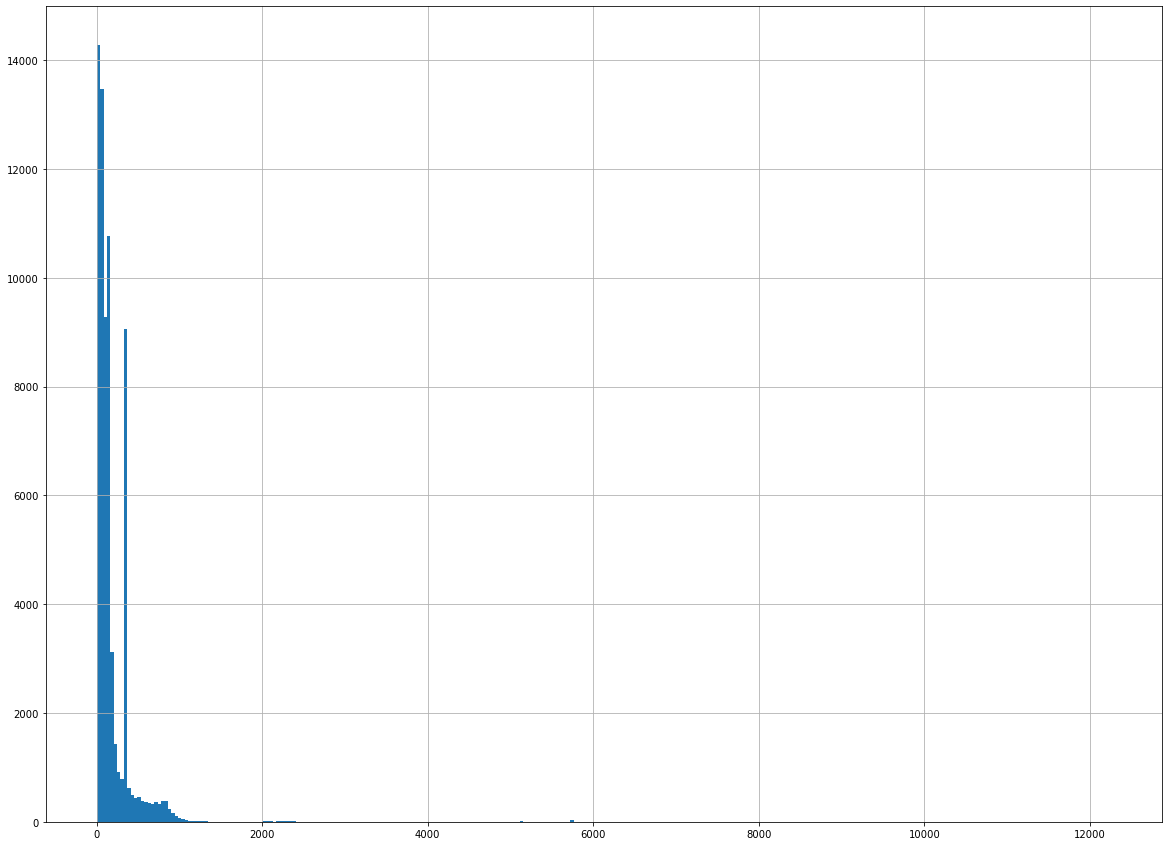

In [32]:
t_data_LA_2['Delay Minutes'].hist(bins=300, figsize=(20,15))
plt.show()
#range=[0,350],

In [33]:
severity_classifier = t_data_LA_2['Severity_Classifier']

for i in range (len(severity_classifier)):
    if(t_data_LA_2['Delay Minutes'].iloc[i] >= 120):
        t_data_LA_2['Severity_Classifier'].iloc[i] = 1 #Major - 1

    else:
        t_data_LA_2['Severity_Classifier'].iloc[i] = 0 #Minor - 0
    
t_data_LA_2.head(10)    



C:\Users\micha\anaconda3\envs\498A\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Visibility(mi),Precipitation(in),Delay,Delay Minutes,L,R,Blowing Dust,Clear,Cloudy,Duststorm,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,Light Drizzle,Light Rain,Light Rain / Windy,Light Rain with Thunder,Mist,Mostly Cloudy,Mostly Cloudy / Windy,Overcast,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Rain,Rain / Windy,Scattered Clouds,Shallow Fog,Smoke,T-Storm,Thunder,Thunderstorm,crossing_false,crossing_true,junction_false,junction_true,traffic_signal_false,traffic_signal_true,Day,Night,Severity_Classifier
5235,2,2016-03-22 19:36:44,2016-03-23 01:36:44,34.092560,-118.206220,34.092560,-118.206220,0.000,Los Angeles,64.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
5238,2,2016-03-22 20:59:43,2016-03-23 02:59:43,33.948190,-118.279730,33.946760,-118.279750,0.099,Los Angeles,64.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
5253,3,2016-03-23 07:59:47,2016-03-23 13:59:47,34.023300,-118.172880,34.021380,-118.173390,0.136,Los Angeles,55.9,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
5271,2,2016-03-23 11:50:32,2016-03-23 17:50:32,34.144700,-118.278650,34.141040,-118.277840,0.257,Los Angeles,73.9,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5273,2,2016-03-23 12:16:45,2016-03-23 18:16:45,34.099140,-118.251853,34.099817,-118.251396,0.054,Los Angeles,73.9,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5277,2,2016-03-23 13:07:50,2016-03-23 19:07:50,33.984070,-118.280700,33.980680,-118.280980,0.235,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5278,2,2016-03-23 13:24:23,2016-03-23 19:24:23,34.052698,-118.226924,34.052697,-118.226921,0.000,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5280,2,2016-03-23 13:32:23,2016-03-23 19:32:23,34.076240,-118.231290,34.074040,-118.233540,0.199,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5283,2,2016-03-23 13:42:44,2016-03-23 19:42:44,34.015410,-118.170780,34.017200,-118.174320,0.237,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5285,2,2016-03-23 13:58:05,2016-03-23 19:58:05,34.032875,-118.222227,34.032882,-118.222224,0.001,Los Angeles,75.0,NaN,10.0,NaN,0 days 06:00:00,360.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [34]:
describe = t_data_LA_2.describe()
median_temperature = describe.loc['mean', 'Temperature(F)']
median_wind = describe.loc['mean', 'Wind_Chill(F)']
median_visibility = describe.loc['mean', 'Visibility(mi)']

t_data_LA_2['Temperature(F)'].fillna(median_temperature, inplace = True)
t_data_LA_2['Wind_Chill(F)'].fillna(median_wind, inplace = True)
t_data_LA_2['Visibility(mi)'].fillna(median_visibility, inplace = True)
t_data_LA_2['Precipitation(in)'].fillna(0, inplace = True)

t_data_LA_2.isnull().sum()

Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat                    0
End_Lng                    0
Distance(mi)               0
City                       0
Temperature(F)             0
Wind_Chill(F)              0
Visibility(mi)             0
Precipitation(in)          0
Delay                      0
Delay Minutes              0
L                          0
R                          0
Blowing Dust               0
Clear                      0
Cloudy                     0
Duststorm                  0
Fair                       0
Fair / Windy               0
Fog                        0
Haze                       0
Heavy Rain                 0
Heavy Rain / Windy         0
Heavy T-Storm              0
Light Drizzle              0
Light Rain                 0
Light Rain / Windy         0
Light Rain with Thunder    0
Mist                       0
Mostly Cloudy              0
Mostly Cloudy 

In [35]:
from sklearn.model_selection import train_test_split

x = t_data_LA_2[['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Visibility(mi)', 'Precipitation(in)', 'L', 'R', 'Blowing Dust', 'Clear', 'Cloudy', 'Duststorm', 'Fair', 'Fair / Windy', 'Fog', 'Haze', 'Heavy Rain', 'Heavy Rain / Windy', 'Heavy T-Storm', 'Light Drizzle', 'Light Rain', 'Light Rain / Windy', 'Light Rain with Thunder', 'Mist', 'Mostly Cloudy', 'Mostly Cloudy / Windy', 'Overcast', 'Partly Cloudy', 'Partly Cloudy / Windy', 'Patches of Fog', 'Rain', 'Rain / Windy', 'Scattered Clouds', 'Shallow Fog', 'Smoke', 'T-Storm', 'Thunder', 'Thunderstorm', 'crossing_false', 'crossing_true', 'junction_false', 'junction_true', 'traffic_signal_false', 'traffic_signal_true', 'Day', 'Night']]
y = t_data_LA_2['Severity_Classifier']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, train_size = 0.67, random_state = 42)

In [36]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
neg_log_loss = dict()

In [37]:
from matplotlib import style

style.use('dark_background')

### Logistic Regression

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 42, n_jobs = -1, max_iter = 100) 
parameters = {'solver': ['newton-cg','sag', 'saga']}
grid_lr = GridSearchCV(lr_model, parameters, n_jobs = -1, verbose = 5)
grid_lr.fit(x_train, y_train)

print("Best parameters scores:")
print(grid_lr.best_params_)
print("Train score:", grid_lr.score(x_train, y_train))
print("Test score:", grid_lr.score(x_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters scores:
{'solver': 'newton-cg'}
Train score: 0.6517965367965368
Test score: 0.6394796976621551


In [39]:
print("Default scores:")
lr_model.fit(x_train, y_train)
print("Train Score:", lr_model.score(x_train, y_train))
print("Test Score:", lr_model.score(x_test, y_test))

Default scores:
Train Score: 0.6411471861471861
Test Score: 0.6356125856916857


In [40]:
pd.DataFrame(grid_lr.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,55.286145,12.159824,0.015567,0.007915,newton-cg,{'solver': 'newton-cg'},0.648268,0.655844,0.649134,0.655087,0.646537,0.650974,0.003769,1
1,14.106016,2.056867,0.009585,0.002142,sag,{'solver': 'sag'},0.641017,0.649026,0.643615,0.648701,0.636147,0.643701,0.004850,2
2,13.084938,0.416384,0.007579,0.002240,saga,{'solver': 'saga'},0.640368,0.645346,0.638961,0.644264,0.633225,0.640433,0.004311,3


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, confusion_matrix, classification_report

y_pred_lr = lr_model.predict(x_test)

accuracy["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)
f1["Logistic Regression"] = f1_score(y_test, y_pred_lr, average = "macro")
recall["Logistic Regression"] = recall_score(y_test, y_pred_lr)
# neg_log_loss["Logistic Regression"] = log_loss(y_test, y_pred_lr)
precision["Logistic Regression"] = precision_score(y_test, y_pred_lr)

target_names = ['Major', 'Minor']

# print(classification_report(y_train, lr_model.predict(x_train), target_names = target_names))
print(classification_report(y_test, y_pred_lr, target_names = target_names))

              precision    recall  f1-score   support

       Major       0.61      0.74      0.67     11227
       Minor       0.68      0.53      0.60     11529

    accuracy                           0.64     22756
   macro avg       0.64      0.64      0.63     22756
weighted avg       0.64      0.64      0.63     22756



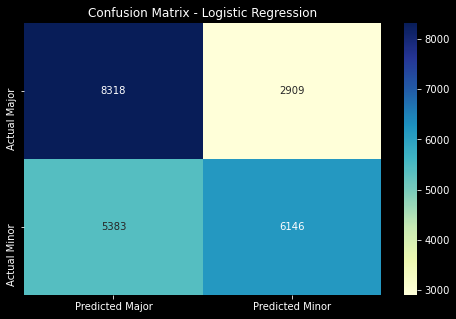

In [42]:
cm_lr = confusion_matrix(y_true = y_test, y_pred = y_pred_lr)

index = ["Actual Major", "Actual Minor"]
columns = ["Predicted Major", "Predicted Minor"]
conf_matrix_lr = pd.DataFrame(data = cm_lr, columns = columns, index = index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="YlGnBu") #YlGnBu fmet="d"
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Support Vector Machine

In [43]:
from sklearn.svm import SVC

parameters = [{"kernel": ["linear", "rbf"], "C": [0.5, 1, 2]}, {"kernel": ["poly"], "C": [0.5, 1, 2], "degree": [2, 3, 5]}]
svc = SVC(verbose=5, random_state=42, max_iter=100)
grid_svc = GridSearchCV(svc, parameters, verbose=5, n_jobs=-1)

grid_svc.fit(x_train, y_train)

print("Best parameters scores:")
print(grid_svc.best_params_)
print("Train score:", grid_svc.score(x_train, y_train))
print("Test score:", grid_svc.score(x_test, y_test))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[LibSVM]

C:\Users\micha\anaconda3\envs\498A\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters scores:
{'C': 2, 'kernel': 'linear'}
Train score: 0.5201731601731602
Test score: 0.5263666725259273


In [44]:
print("Default scores:")
svc.fit(x_train, y_train)
print("Train Score:", svc.score(x_train, y_train))
print("Test Score:", svc.score(x_test, y_test))

Default scores:
[LibSVM]

C:\Users\micha\anaconda3\envs\498A\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Train Score: 0.5530952380952381
Test Score: 0.5440323431182985


In [45]:
pd.DataFrame(grid_svc.cv_results_).sort_values(by = "rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,2.515334,0.282636,0.259196,0.061273,2,linear,NaN,"{'C': 2, 'kernel': 'linear'}",0.561688,0.459848,0.505736,0.508225,0.546212,0.516342,0.035548,1
7,2.755016,0.059105,0.283178,0.036922,0.5,poly,3,"{'C': 0.5, 'degree': 3, 'kernel': 'poly'}",0.511797,0.509848,0.521429,0.520346,0.514394,0.515563,0.004593,2
10,2.670349,0.144830,0.325051,0.079418,1,poly,3,"{'C': 1, 'degree': 3, 'kernel': 'poly'}",0.511797,0.509848,0.521429,0.520346,0.514394,0.515563,0.004593,2
13,3.474715,0.485206,0.450506,0.102072,2,poly,3,"{'C': 2, 'degree': 3, 'kernel': 'poly'}",0.511797,0.509848,0.521429,0.520346,0.514394,0.515563,0.004593,2
0,3.148153,0.395989,0.272535,0.039385,0.5,linear,NaN,"{'C': 0.5, 'kernel': 'linear'}",0.533009,0.500433,0.517100,0.509199,0.516883,0.515325,0.010748,5
6,3.650556,0.796101,0.304450,0.084364,0.5,poly,2,"{'C': 0.5, 'degree': 2, 'kernel': 'poly'}",0.512446,0.501299,0.514719,0.522186,0.507900,0.511710,0.006961,6
9,3.523895,0.320927,0.411035,0.104368,1,poly,2,"{'C': 1, 'degree': 2, 'kernel': 'poly'}",0.512446,0.501299,0.514719,0.522186,0.507900,0.511710,0.006961,6
12,3.820163,0.387141,0.399367,0.052248,2,poly,2,"{'C': 2, 'degree': 2, 'kernel': 'poly'}",0.512446,0.501299,0.514719,0.522186,0.507900,0.511710,0.006961,6
8,3.009600,0.239379,0.410624,0.098750,0.5,poly,5,"{'C': 0.5, 'degree': 5, 'kernel': 'poly'}",0.512554,0.514177,0.507359,0.507359,0.511905,0.510671,0.002804,9
11,3.285439,0.347127,0.396177,0.066568,1,poly,5,"{'C': 1, 'degree': 5, 'kernel': 'poly'}",0.512554,0.514177,0.507359,0.507359,0.511905,0.510671,0.002804,9


In [46]:
y_pred_svc = svc.predict(x_test)

accuracy["Support Vector Machine"] = accuracy_score(y_test, y_pred_svc)
f1["Support Vector Machine"] = f1_score(y_test, y_pred_svc, average="macro")
recall["Support Vector Machine"] = recall_score(y_test, y_pred_svc)
# neg_log_loss["Support Vector Machine"] = log_loss(y_test, y_pred_svc) 
precision["Support Vector Machine"] = precision_score(y_test, y_pred_svc)

# print(classification_report(y_train, svc.predict(x_train), target_names = target_names))
print(classification_report(y_test, y_pred_svc, target_names = target_names))

              precision    recall  f1-score   support

       Major       0.53      0.67      0.59     11227
       Minor       0.57      0.42      0.49     11529

    accuracy                           0.54     22756
   macro avg       0.55      0.55      0.54     22756
weighted avg       0.55      0.54      0.54     22756



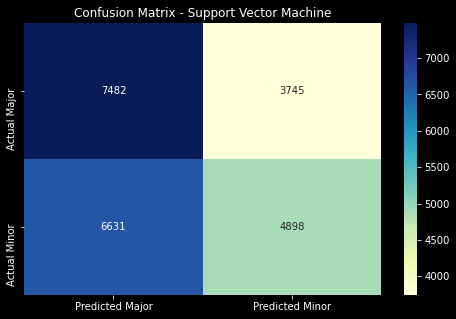

In [47]:
cm_svc = confusion_matrix(y_true=y_test, y_pred=y_pred_svc)

index = ["Actual Major", "Actual Minor"]
columns = ["Predicted Major", "Predicted Minor"]
conf_matrix_svc = pd.DataFrame(data = cm_svc, columns = columns, index = index)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_svc, annot = True, fmt = "d", cmap = "YlGnBu") #YlGnBu fmet="d"
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest algorithm

clf_base = RandomForestClassifier()
grid_clf = {'n_estimators': [10, 50, 100],
        'max_features': ['auto','sqrt']}
clf_rf = GridSearchCV(clf_base, grid_clf, cv = 5, n_jobs = 8, scoring = 'f1_macro')

clf_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 50, 100]},
             scoring='f1_macro')

In [49]:
print("Best parameters scores:")
print(clf_rf.best_params_)
print("Train score:", clf_rf.score(x_train, y_train))
print("Test score:", clf_rf.score(x_test, y_test))

Best parameters scores:
{'max_features': 'sqrt', 'n_estimators': 100}
Train score: 0.9883981927139838
Test score: 0.7501893698091391


In [50]:
print("Default scores:")
clf_base.fit(x_train, y_train)
print("Train score:", clf_base.score(x_train, y_train))
print("Test Score:", clf_base.score(x_test, y_test))

Default scores:
Train score: 0.9883766233766234
Test Score: 0.7502636667252592


In [51]:
pd.DataFrame(clf_rf.cv_results_).sort_values(by = "rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,28.825912,1.229149,0.788276,0.254043,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",0.751077,0.741027,0.745240,0.748650,0.742745,0.745748,0.003698,1
2,42.471208,2.292921,1.497001,0.050329,auto,100,"{'max_features': 'auto', 'n_estimators': 100}",0.750489,0.741547,0.744928,0.747692,0.741466,0.745225,0.003508,2
4,19.704217,0.775057,0.865780,0.145366,sqrt,50,"{'max_features': 'sqrt', 'n_estimators': 50}",0.748112,0.737641,0.739941,0.744920,0.743870,0.742897,0.003704,3
1,25.821012,1.506002,1.271397,0.298911,auto,50,"{'max_features': 'auto', 'n_estimators': 50}",0.746323,0.735188,0.740948,0.742536,0.740234,0.741046,0.003607,4
3,4.241960,0.180292,0.191379,0.027280,sqrt,10,"{'max_features': 'sqrt', 'n_estimators': 10}",0.729444,0.730350,0.733319,0.737366,0.727952,0.731686,0.003337,5
0,4.248597,0.614434,0.205525,0.034610,auto,10,"{'max_features': 'auto', 'n_estimators': 10}",0.727856,0.722989,0.730594,0.733382,0.726561,0.728276,0.003536,6


In [52]:
y_pred_rf = clf_rf.predict(x_test)

accuracy["Random Forest Classifier"] = accuracy_score(y_test, y_pred_rf)
f1["Random Forest Classifier"] = f1_score(y_test, y_pred_rf, average = "macro")
recall["Random Forest Classifier"] = recall_score(y_test, y_pred_rf)
# neg_log_loss["Random Forest Classifier"] = log_loss(y_test, y_pred_rf) 
precision["Random Forest Classifier"] = precision_score(y_test, y_pred_rf)

# print(classification_report(y_train, clf_rf.predict(x_train), target_names=target_names))
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     11227
         1.0       0.74      0.78      0.76     11529

    accuracy                           0.75     22756
   macro avg       0.75      0.75      0.75     22756
weighted avg       0.75      0.75      0.75     22756



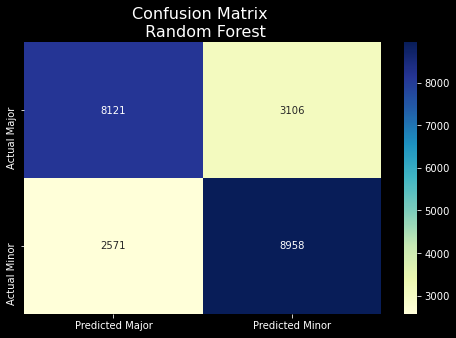

In [53]:
cm_rf = confusion_matrix(y_true = y_test, y_pred = y_pred_rf)

index = ["Actual Major", "Actual Minor"]
columns = ["Predicted Major", "Predicted Minor"]

conf_matrix_rf = pd.DataFrame(data = cm_rf, columns = columns, index = index)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_rf, annot=True,fmt='d',cmap="YlGnBu").set_title("Confusion Matrix \n Random Forest", fontsize=16)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


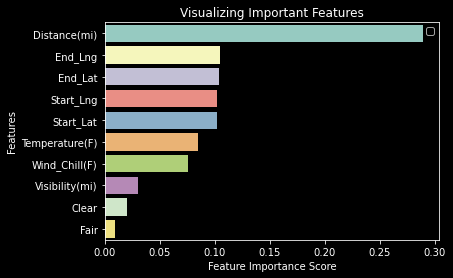

In [54]:
clf_rf_model = RandomForestClassifier(n_estimators = 100, max_features = 'auto') # input parameters based on grid search
clf_rf_model.fit(x_train, y_train)

feature_imp = pd.Series(clf_rf_model.feature_importances_, index = x.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:k], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


### Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [56]:
print("Best Default Scores:")
print("Train Score:", gnb.score(x_train, y_train))
print("Test Score:", gnb.score(x_test, y_test))

Best Default Scores:
Train Score: 0.5474242424242424
Test Score: 0.5460977324661628


In [57]:
y_pred_gnb = gnb.predict(x_test)

accuracy["Gaussian Naive Bayes"] = accuracy_score(y_test, y_pred_gnb)
f1["Gaussian Naive Bayes"] = f1_score(y_test, y_pred_gnb, average="macro")
recall["Gaussian Naive Bayes"] = recall_score(y_test, y_pred_gnb)
# neg_log_loss["Gaussian Naive Bayes"] = log_loss(y_test, y_pred_gnb) 
precision["Gaussian Naive Bayes"] = precision_score(y_test, y_pred_gnb)

# print(classification_report(y_train, gnb.predict(x_train), target_names=target_names))
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.61      0.22      0.32     11227
         1.0       0.53      0.86      0.66     11529

    accuracy                           0.55     22756
   macro avg       0.57      0.54      0.49     22756
weighted avg       0.57      0.55      0.49     22756



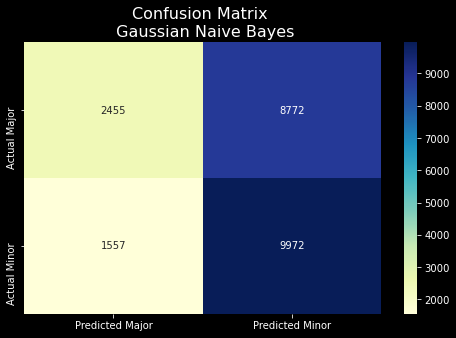

In [58]:
cm_gnb = confusion_matrix(y_true = y_test, y_pred = y_pred_gnb)

index = ["Actual Major", "Actual Minor"]
columns = ["Predicted Major", "Predicted Minor"]

conf_matrix_gnb = pd.DataFrame(data = cm_gnb, columns = columns, index = index)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_gnb, annot = True, fmt = 'd', cmap = "YlGnBu").set_title("Confusion Matrix \n Gaussian Naive Bayes", fontsize = 16)
plt.show()

### Multinomial Naive Bayes

In [59]:
# from sklearn.naive_bayes import MultinomialNB

# mnb = MultinomialNB()
# mnb.fit(x_train, y_train)

### Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(random_state = 42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid_dtc = GridSearchCV(dtc, parameters, verbose = 5, n_jobs = -1)
grid_dtc.fit(x_train, y_train)

print("Best parameters scores:")
print(grid_dtc.best_params_)
print("Train score:", grid_dtc.score(x_train, y_train))
print("Test score:", grid_dtc.score(x_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters scores:
{'criterion': 'gini', 'max_depth': 10}
Train score: 0.7525541125541125
Test score: 0.7291703287045175


In [61]:
print("Default scores:")
dtc.fit(x_train, y_train)
print("Train score:", dtc.score(x_train, y_train))
print("Test Score:", dtc.score(x_test, y_test))

Default scores:
Train score: 0.9883982683982684
Test Score: 0.7090437686763931


In [62]:
pd.DataFrame(grid_dtc.cv_results_).sort_values(by = "rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.057378,0.344776,0.022545,0.010662,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.738420,0.725974,0.726190,0.739719,0.726515,0.731364,0.006307,1
5,1.980842,0.430921,0.019763,0.014116,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.736688,0.722619,0.726299,0.738853,0.729221,0.730736,0.006151,2
6,2.602319,0.857087,0.035425,0.030159,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.730519,0.719372,0.728355,0.735173,0.728139,0.728312,0.005136,3
2,2.141959,0.050580,0.019386,0.003847,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.727056,0.710498,0.726407,0.729004,0.724567,0.723506,0.006657,4
0,0.445299,0.026427,0.012282,0.001204,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.722727,0.716883,0.720887,0.722403,0.721429,0.720866,0.002098,5
4,1.037500,0.495751,0.041782,0.039249,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.721537,0.714610,0.714286,0.722186,0.718398,0.718203,0.003325,6
7,3.504413,1.047857,0.029672,0.012355,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.705303,0.693831,0.700758,0.709632,0.695563,0.701017,0.005900,7
3,1.942591,0.378619,0.019549,0.003868,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.701732,0.696104,0.700541,0.709848,0.691017,0.699848,0.006262,8


In [63]:
y_pred_dtc = dtc.predict(x_test)

accuracy["Decision Tree"] = accuracy_score(y_test, y_pred_dtc)
f1["Decision Tree"] = f1_score(y_test, y_pred_dtc, average = "macro")
recall["Decision Tree"] = recall_score(y_test, y_pred_dtc)
# neg_log_loss["Decision Tree"] = log_loss(y_test, y_pred_dtc) 
precision["Decision Tree"] = precision_score(y_test, y_pred_dtc)

# print(classification_report(y_train, dtc.predict(x_train), target_names = target_names))
print(classification_report(y_test, y_pred_dtc, target_names = target_names))

              precision    recall  f1-score   support

       Major       0.70      0.71      0.71     11227
       Minor       0.71      0.71      0.71     11529

    accuracy                           0.71     22756
   macro avg       0.71      0.71      0.71     22756
weighted avg       0.71      0.71      0.71     22756



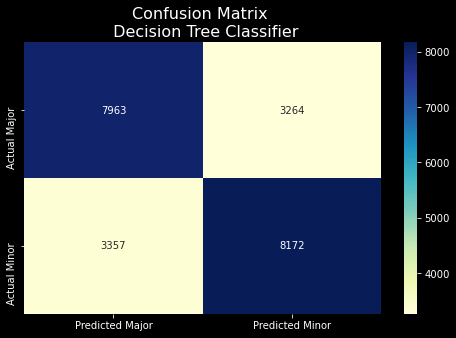

In [64]:
cm_dtc = confusion_matrix(y_true = y_test, y_pred = y_pred_dtc)

index = ['Actual Major', 'Actual Minor']
columns = ['Predicted Major', 'Predicted Minor']

conf_matrix_dtc = pd.DataFrame(data = cm_dtc, columns = columns, index = index)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix_dtc, annot=True,fmt='d',cmap='YlGnBu').set_title('Confusion Matrix \n Decision Tree Classifier', fontsize=16)
plt.show()

### Results

C:\Users\micha\anaconda3\envs\498A\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


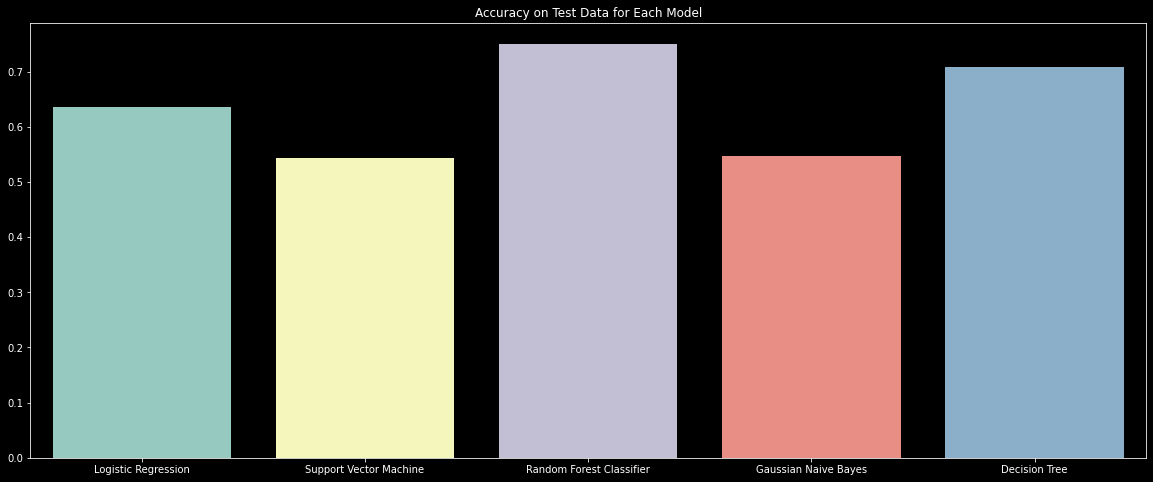

In [65]:
plt.figure(figsize = (20, 8))
plt.title("Accuracy on Test Data for Each Model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels = accuracy.keys())
plt.show()

C:\Users\micha\anaconda3\envs\498A\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


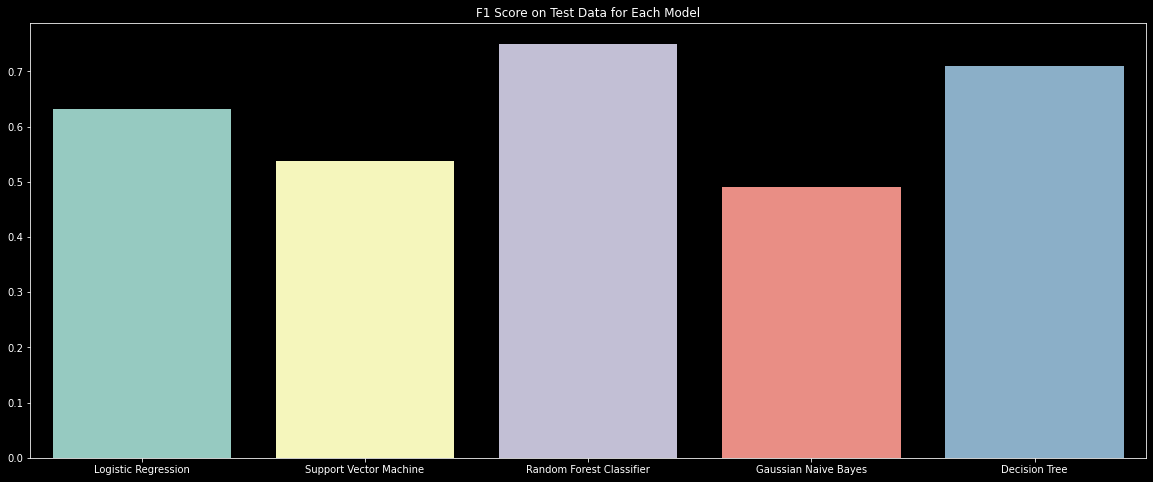

In [66]:
plt.figure(figsize = (20, 8))
plt.title("F1 Score on Test Data for Each Model")
sns.barplot(list(range(len(f1))), list(f1.values()))
plt.xticks(range(len(f1)), labels = f1.keys())
plt.show()

C:\Users\micha\anaconda3\envs\498A\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


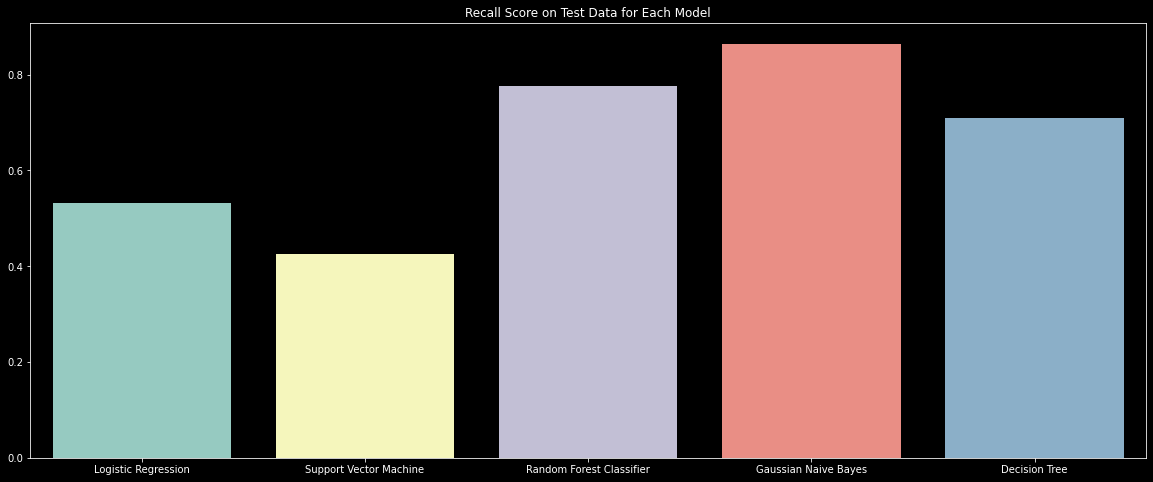

In [67]:
plt.figure(figsize = (20, 8))
plt.title("Recall Score on Test Data for Each Model")
sns.barplot(list(range(len(recall))), list(recall.values()))
plt.xticks(range(len(recall)), labels = recall.keys())
plt.show()

C:\Users\micha\anaconda3\envs\498A\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


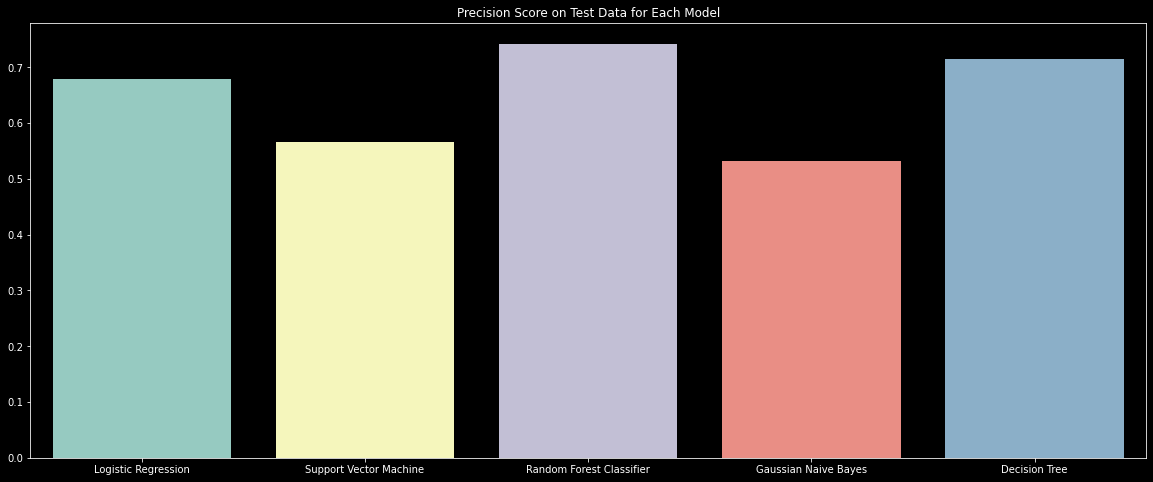

In [68]:
plt.figure(figsize = (20, 8))
plt.title("Precision Score on Test Data for Each Model")
sns.barplot(list(range(len(precision))), list(precision.values()))
plt.xticks(range(len(precision)), labels = precision.keys())
plt.show()

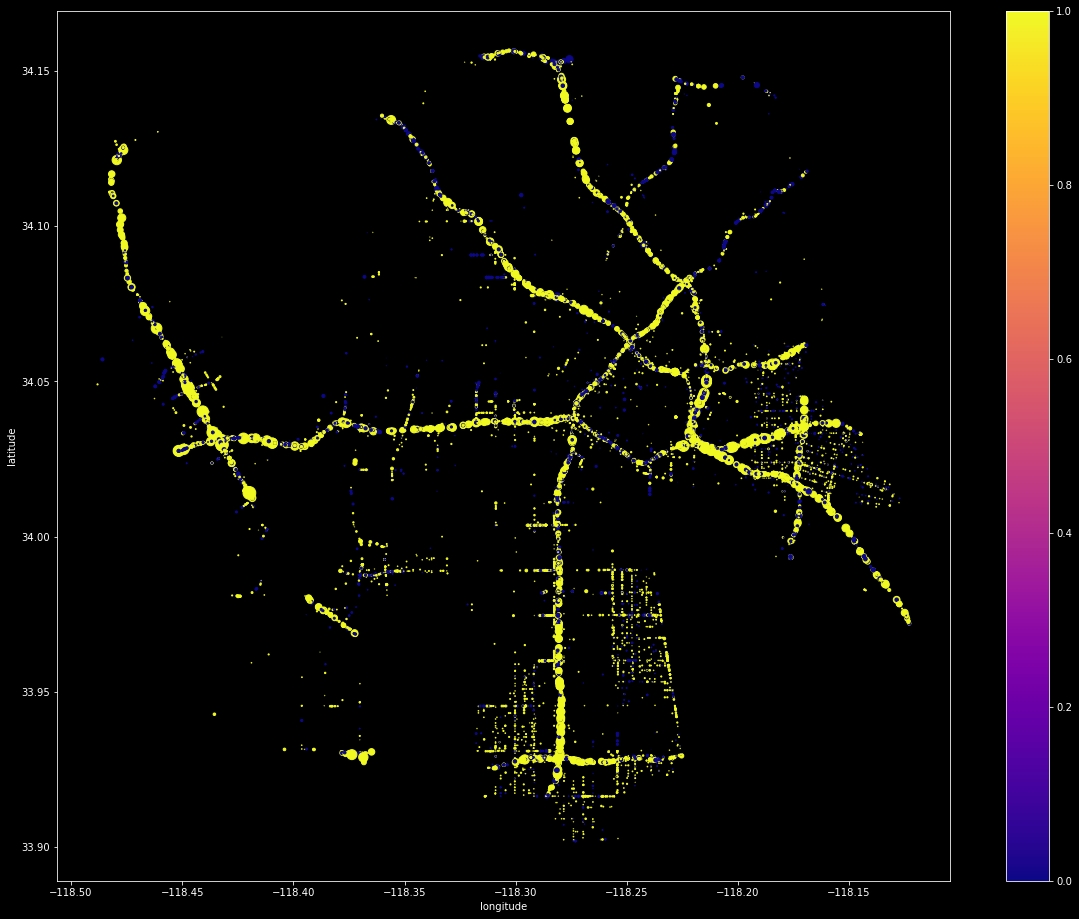

In [69]:
plt.figure(figsize=(20,16)) #dpi and fig size don't increase
plt.scatter(x=x_test['Start_Lng'], y = x_test['Start_Lat'], c = y_pred_rf, s = x_test['Distance(mi)']*10, cmap = 'plasma')
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()